<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Practical 3b - Overfitting and Underfitting</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [2]:
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.2.4-tf


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Objectives
After completing this practical exercise, students should be able to:
1. [Understand how to prevent overfitting in Neural Networks](#over)
2. [Exercise - Develop your own model and try to avoid overfitting](#exc)

### Load Data

Note: in this notebook we will be using the IMDB test set as our validation set. It doesn't matter in this context.

Let's prepare the data using the code from Practical 2:

In [4]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 1. How to prevent overfitting in Neural Networks <a id='over' />

### 1.1 Reducing the network's size 

Our original network was as such:

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


Now let's try to replace it with this smaller network:

In [5]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [6]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
25000/25000 [==============================] - 4s 151us/sample - loss: 0.4379 - acc: 0.8212 - val_loss: 0.3254 - val_acc: 0.8820
Epoch 2/20
25000/25000 [==============================] - 3s 127us/sample - loss: 0.2506 - acc: 0.9105 - val_loss: 0.2922 - val_acc: 0.8832
Epoch 3/20
25000/25000 [==============================] - 3s 121us/sample - loss: 0.1962 - acc: 0.9302 - val_loss: 0.3283 - val_acc: 0.8682
Epoch 4/20
25000/25000 [==============================] - 3s 130us/sample - loss: 0.1663 - acc: 0.9402 - val_loss: 0.2959 - val_acc: 0.8830
Epoch 5/20
25000/25000 [==============================] - 3s 125us/sample - loss: 0.1434 - acc: 0.9491 - val_loss: 0.3464 - val_acc: 0.8700
Epoch 6/20
25000/25000 [==============================] - 3s 123us/sample - loss: 0.1232 - acc: 0.9578 - val_loss: 0.3611 - val_acc: 0.8676
Epoch 7/20
25000/25000 [==============================] - 3s 1

In [7]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 135us/sample - loss: 0.5878 - acc: 0.7066 - val_loss: 0.5460 - val_acc: 0.7124
Epoch 2/20
25000/25000 [==============================] - 3s 116us/sample - loss: 0.4919 - acc: 0.8370 - val_loss: 0.4908 - val_acc: 0.8459
Epoch 3/20
25000/25000 [==============================] - 3s 113us/sample - loss: 0.4472 - acc: 0.8869 - val_loss: 0.4716 - val_acc: 0.8415
Epoch 4/20
25000/25000 [==============================] - 3s 114us/sample - loss: 0.4153 - acc: 0.9092 - val_loss: 0.4519 - val_acc: 0.8705
Epoch 5/20
25000/25000 [==============================] - 3s 117us/sample - loss: 0.3901 - acc: 0.9275 - val_loss: 0.4435 - val_acc: 0.8714
Epoch 6/20
25000/25000 [==============================] - 3s 117us/sample - loss: 0.3688 - acc: 0.9361 - val_loss: 0.4583 - val_acc: 0.8515
Epoch 7/20
25000/25000 [==============================] - 3s 119us/sample - loss: 0.3496 - acc: 0.9460 - val_l

In [8]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of 
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

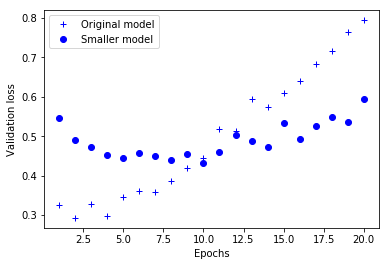

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the smaller network starts overfitting later than the reference one (after 6 epochs rather than 4) and its performance 
degrades much more slowly once it starts overfitting.

Now, for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [10]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [11]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 11s 430us/sample - loss: 0.4700 - acc: 0.7960 - val_loss: 0.2852 - val_acc: 0.8881
Epoch 2/20
25000/25000 [==============================] - 11s 426us/sample - loss: 0.2192 - acc: 0.9146 - val_loss: 0.5097 - val_acc: 0.7931
Epoch 3/20
25000/25000 [==============================] - 10s 418us/sample - loss: 0.1394 - acc: 0.9488 - val_loss: 0.2891 - val_acc: 0.8847
Epoch 4/20
25000/25000 [==============================] - 11s 427us/sample - loss: 0.0535 - acc: 0.9830 - val_loss: 0.6707 - val_acc: 0.8322
Epoch 5/20
25000/25000 [==============================] - 11s 421us/sample - loss: 0.0692 - acc: 0.9796 - val_loss: 0.3853 - val_acc: 0.8816
Epoch 6/20
25000/25000 [==============================] - 10s 417us/sample - loss: 0.0037 - acc: 0.9996 - val_loss: 0.6341 - val_acc: 0.8807
Epoch 7/20
25000/25000 [==============================] - 11s 425us/sample - loss: 0.0878 - acc: 0.9883 

Here's how the bigger network fares compared to the reference one. The dots are the validation loss values of the bigger network, and the 
crosses are the initial network.

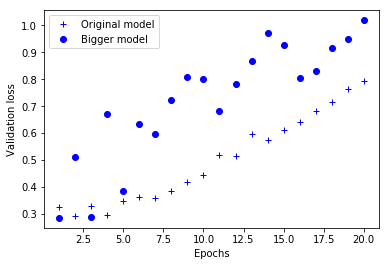

In [12]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


The bigger network starts overfitting almost right away, after just one epoch, and overfits much more severely. Its validation loss is also 
more noisy.

Meanwhile, here are the training losses for our two networks:

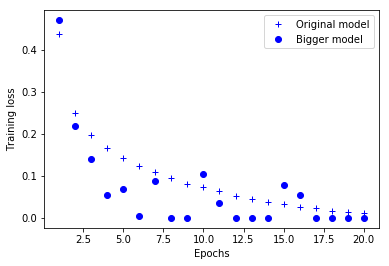

In [13]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

As you can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be 
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large 
difference between the training and validation loss).

### 1.2 Adding weight regularization

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments. Let's add L2 weight regularization to our movie review classification network:

In [14]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of the network. 

Here's the impact of our L2 regularization penalty:

In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 135us/sample - loss: 0.4821 - acc: 0.8264 - val_loss: 0.3925 - val_acc: 0.8626
Epoch 2/20
25000/25000 [==============================] - 3s 125us/sample - loss: 0.3127 - acc: 0.9049 - val_loss: 0.3330 - val_acc: 0.8897
Epoch 3/20
25000/25000 [==============================] - 3s 126us/sample - loss: 0.2701 - acc: 0.9203 - val_loss: 0.3486 - val_acc: 0.8802
Epoch 4/20
25000/25000 [==============================] - 3s 130us/sample - loss: 0.2498 - acc: 0.9298 - val_loss: 0.3376 - val_acc: 0.8860
Epoch 5/20
25000/25000 [==============================] - 3s 128us/sample - loss: 0.2419 - acc: 0.9313 - val_loss: 0.3572 - val_acc: 0.8796
Epoch 6/20
25000/25000 [==============================] - 3s 126us/sample - loss: 0.2294 - acc: 0.9378 - val_loss: 0.4170 - val_acc: 0.8572
Epoch 7/20
25000/25000 [==============================] - 3s 125us/sample - loss: 0.2262 - acc: 0.9382 - val_l

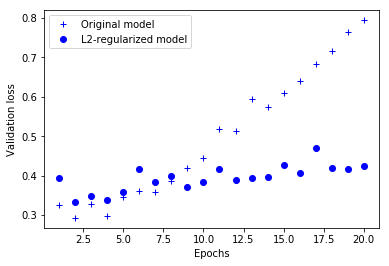

In [17]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()



As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), 
even though both models have the same number of parameters.

As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [18]:
from tensorflow.keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

### 1.3 Adding dropout

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it. Let's add two `Dropout` layers in our IMDB network to see how well they do at reducing overfitting:

In [19]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 135us/sample - loss: 0.6225 - acc: 0.6406 - val_loss: 0.4873 - val_acc: 0.8580
Epoch 2/20
25000/25000 [==============================] - 3s 123us/sample - loss: 0.4710 - acc: 0.7884 - val_loss: 0.3411 - val_acc: 0.8800
Epoch 3/20
25000/25000 [==============================] - 3s 124us/sample - loss: 0.3676 - acc: 0.8558 - val_loss: 0.3027 - val_acc: 0.8812
Epoch 4/20
25000/25000 [==============================] - 3s 130us/sample - loss: 0.3063 - acc: 0.8871 - val_loss: 0.2852 - val_acc: 0.8830
Epoch 5/20
25000/25000 [==============================] - 3s 129us/sample - loss: 0.2614 - acc: 0.9064 - val_loss: 0.2846 - val_acc: 0.8855
Epoch 6/20
25000/25000 [==============================] - 3s 125us/sample - loss: 0.2269 - acc: 0.9201 - val_loss: 0.2933 - val_acc: 0.8876
Epoch 7/20
25000/25000 [==============================] - 3s 124us/sample - loss: 0.2090 - acc: 0.9266 - val_l

Let's plot the results:

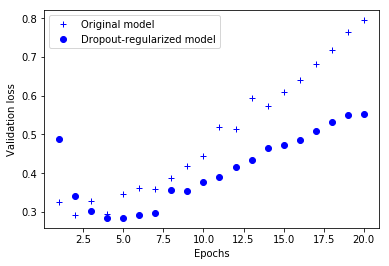

In [21]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.

## 2. Exercise <a id='exc' />
Please develop your own model for IMDB review classification problem following "The Universal Workflow of Machine Learning" and try to maximize the validation accuracy. When you are regularizing the model you can utilize the below tecniques:
* Add dropout
* Try different architectures: add or remove layers, increase or decrease the number of units per layer
* Add L1 and / or L2 regularization
* Adjust the hyperparameters, e.g. the learning rate of the optimizer, the number of epochs, batch_size and etc.

Provide your codes and comments in the below boxes.

In [9]:
# Task 1: Build and Compile the model. 
# Remember to use the above mentioned regularization techniques
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid', input_shape=(10000,)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80008     
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________

In [10]:
# Task 2: Compile and Fit the model
# You can adjust the number of epochs, the batch size, the learning rate of the optimizer and etc.
hist = model.fit(x_train, y_train,
                 epochs=60,
                 batch_size=512,
                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/60
25000/25000 [==============================] - 4s 149us/sample - loss: 0.8581 - acc: 0.4995 - val_loss: 0.7793 - val_acc: 0.5000
Epoch 2/60
25000/25000 [==============================] - 3s 132us/sample - loss: 0.7645 - acc: 0.5040 - val_loss: 0.7210 - val_acc: 0.5000
Epoch 3/60
25000/25000 [==============================] - 3s 125us/sample - loss: 0.7171 - acc: 0.5280 - val_loss: 0.6861 - val_acc: 0.5000
Epoch 4/60
25000/25000 [==============================] - 3s 125us/sample - loss: 0.6846 - acc: 0.6006 - val_loss: 0.6550 - val_acc: 0.7051
Epoch 5/60
25000/25000 [==============================] - 3s 125us/sample - loss: 0.6570 - acc: 0.6539 - val_loss: 0.6272 - val_acc: 0.8420
Epoch 6/60
25000/25000 [==============================] - 3s 123us/sample - loss: 0.6341 - acc: 0.6904 - val_loss: 0.5999 - val_acc: 0.8471
Epoch 7/60
25000/25000 [==============================] - 3s 1

Epoch 57/60
25000/25000 [==============================] - 3s 129us/sample - loss: 0.4320 - acc: 0.8590 - val_loss: 0.3970 - val_acc: 0.8816
Epoch 58/60
25000/25000 [==============================] - 3s 127us/sample - loss: 0.4331 - acc: 0.8604 - val_loss: 0.3968 - val_acc: 0.8810
Epoch 59/60
25000/25000 [==============================] - 3s 123us/sample - loss: 0.4326 - acc: 0.8596 - val_loss: 0.3969 - val_acc: 0.8820
Epoch 60/60
25000/25000 [==============================] - 3s 123us/sample - loss: 0.4306 - acc: 0.8597 - val_loss: 0.3977 - val_acc: 0.8802


Train on 25000 samples, validate on 25000 samples
Epoch 1/60
25000/25000 [==============================] - 3s 132us/sample - loss: 0.6042 - acc: 0.6921 - val_loss: 0.4785 - val_acc: 0.8476
Epoch 2/60
25000/25000 [==============================] - 3s 127us/sample - loss: 0.4698 - acc: 0.8000 - val_loss: 0.3956 - val_acc: 0.8827
Epoch 3/60
25000/25000 [==============================] - 3s 127us/sample - loss: 0.4047 - acc: 0.8522 - val_loss: 0.3559 - val_acc: 0.8866
Epoch 4/60
25000/25000 [==============================] - 3s 123us/sample - loss: 0.3597 - acc: 0.8827 - val_loss: 0.3292 - val_acc: 0.8890
Epoch 5/60
25000/25000 [==============================] - 3s 123us/sample - loss: 0.3239 - acc: 0.9015 - val_loss: 0.3191 - val_acc: 0.8892
Epoch 6/60
25000/25000 [==============================] - 3s 125us/sample - loss: 0.2947 - acc: 0.9155 - val_loss: 0.3222 - val_acc: 0.8877
Epoch 7/60
25000/25000 [==============================] - 3s 136us/sample - loss: 0.2723 - acc: 0.9236 - val_l

Epoch 59/60
25000/25000 [==============================] - 3s 124us/sample - loss: 0.1617 - acc: 0.9607 - val_loss: 0.5278 - val_acc: 0.8697
Epoch 60/60
25000/25000 [==============================] - 3s 123us/sample - loss: 0.1593 - acc: 0.9626 - val_loss: 0.5293 - val_acc: 0.8695


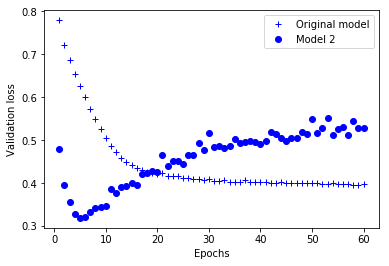

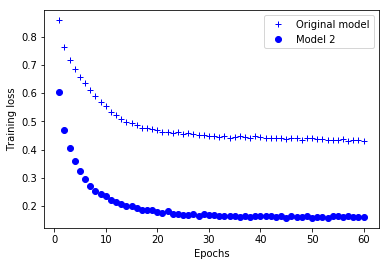

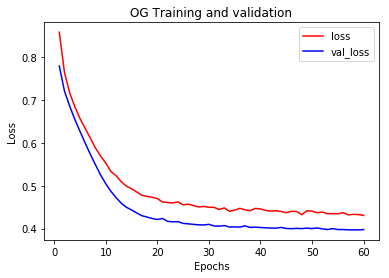

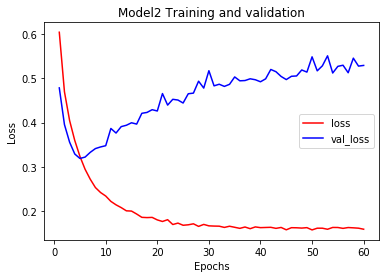

In [11]:
#RANDOM MUCH
#edit to experiment and compare
model2 = models.Sequential()
model2.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

model2_hist = model2.fit(x_train, y_train,
                         epochs=60,
                         batch_size=512,
                         validation_data=(x_test, y_test))


#compares if another model overfits slower or faster
original_val_loss = hist.history['val_loss']
model2_val_loss = model2_hist.history['val_loss']
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 61)
# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, model2_val_loss, 'bo', label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()
#compares training loss. if reach near 0 quickly, means learnt faster but less expossure to learning process.
original_train_loss = hist.history['loss']
model2_train_loss = model2_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, model2_train_loss, 'bo', label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()


#og and model 2
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('OG Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model2_loss = model2_hist.history['loss']
model2_val_loss = model2_hist.history['val_loss']

plt.plot(epochs, model2_loss, 'r', label='loss')
plt.plot(epochs, model2_val_loss, 'b', label='val_loss')
plt.title('Model2 Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

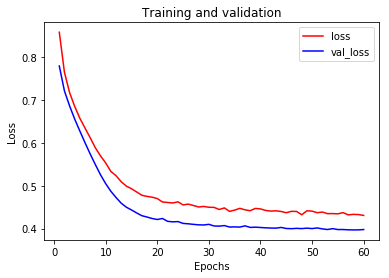

In [12]:
# Task 3: Plot the training and validation accuracy
import matplotlib.pyplot as plt
%matplotlib inline
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, 61)

plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Task 4: Comments
# initially, model was 16 nodes, i shrinked it by half to 8 nodes which seemed better after comparing validation loss and training loss.
# added learning rate of 0.001, which produced a nicer training and validation accuracy graph. 
# added dropout of 0.25
# experimented different combinations of learning rate and dropout.
# researched that validation and training accuracy of approximately at least 0.4 was favourable.
# changed epochs from 20 to 60.
# good fit 